In [ ]:
pip install scikit-learn pandas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from textblob import TextBlob
from io import BytesIO
from google.colab import files

In [ ]:
!gdown 1k8yaPTHgrSosu38Fe84KEg_HemCV82p3
!gdown 1mnq0GrWz-YvWWoYul_LNC3qLED2cxzfR

Downloading...
From: https://drive.google.com/uc?id=1k8yaPTHgrSosu38Fe84KEg_HemCV82p3
To: /content/TEKS - Sheet1.csv
100% 2.57k/2.57k [00:00<00:00, 6.43MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mnq0GrWz-YvWWoYul_LNC3qLED2cxzfR
To: /content/LABEL - Sheet1.csv
100% 529/529 [00:00<00:00, 1.66MB/s]


In [ ]:
teksu = pd.read_csv('TEKS - Sheet1.csv')['Teks']
print(len(teksu))
labelsu = pd.read_csv('LABEL - Sheet1.csv')['Label']
print(len(labelsu))

44
44


In [ ]:

data = pd.DataFrame({'text': teksu, 'label': labelsu})

In [ ]:
print(data)

                                                 text    label
0                                      Kurang praktis  negatif
1   terkadang pembayaran tidak sesuai dengan pemak...  negatif
2                 Terkadang lupa melupakan pembayaran  negatif
3               untuk airnya jorok dan banyak kotoran  negatif
4                                           Belum ada  positif
5   Selama menggunakan meter air pascabayar tidak ...  positif
6                                 Tagihan tinggi hehe  negatif
7   Air yang keluar aangat kecil sehingga membutuh...  negatif
8                                           tidak ada  positif
9                                           Tidak ada  positif
10  selama ini masih berjalan dengan baik dengan a...  negatif
11       Tidak sesuai dengan pemakaian dan pembayaran  negatif
12                sering tidak terkontrol ttg tagihan  negatif
13                        Sejauh pemakaian, belum ada  positif
14                                  Tidak ada keluhan  

In [ ]:

train_data, test_data, train_labels, test_labels = train_test_split(data['text'], data['label'], train_size=0.8, random_state=40)

In [ ]:

model = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    TfidfTransformer(),
    MultinomialNB()
)

In [ ]:
model.fit(train_data, train_labels)

Pipeline(steps=[('countvectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:

predicted_labels = model.predict(test_data)

In [ ]:

print("Accuracy:", accuracy_score(test_labels, predicted_labels))
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels))
print("\nConfusion Matrix:\n", confusion_matrix(test_labels, predicted_labels))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     negatif       1.00      1.00      1.00         7
     positif       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9


Confusion Matrix:
 [[7 0]
 [0 2]]


In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, data['text'], data['label'], cv=cv, scoring='accuracy')


In [ ]:

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [1.         1.         0.77777778 1.         1.        ]
Mean Accuracy: 0.9555555555555555


In [ ]:

vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

In [ ]:

feature_names = vectorizer.get_feature_names_out()
print("\nFeatures (Top 10):\n", feature_names[:10])


Features (Top 10):
 ['11' '11 apaabila' 'aangat' 'aangat kecil' 'ada' 'ada kebocoran'
 'ada keluhan' 'ada sanksi' 'ada satu' 'adil']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

In [ ]:
texts = data['text']

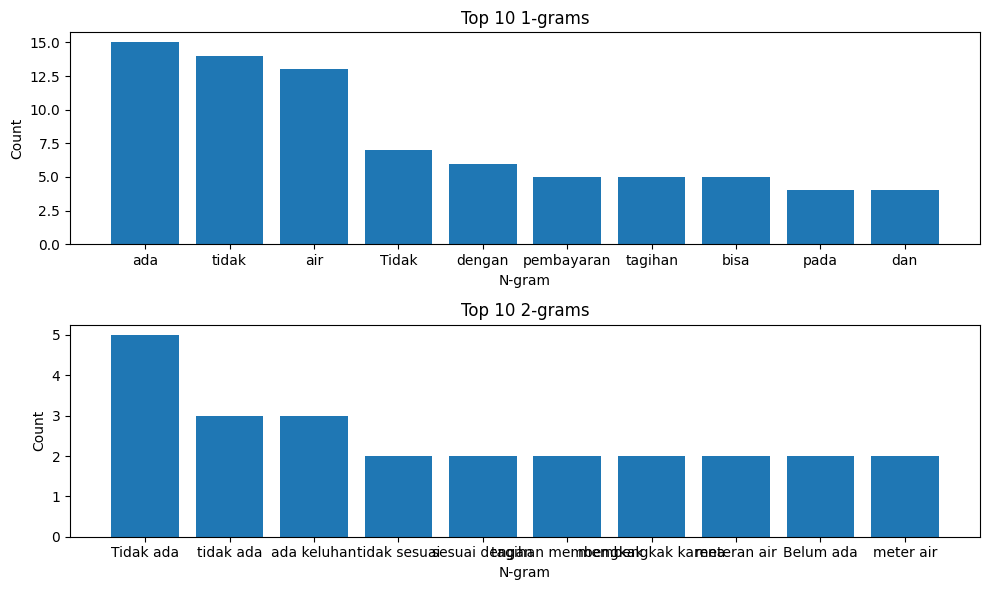

In [ ]:

def extract_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(gram) for gram in n_grams]


n_values = [1, 2]


fig, axes = plt.subplots(nrows=len(n_values), ncols=1, figsize=(10, 6))

for i, n in enumerate(n_values):

    all_ngrams = [extract_ngrams(text, n) for text in texts]


    flattened_ngrams = [gram for sublist in all_ngrams for gram in sublist]


    ngram_counts = Counter(flattened_ngrams)


    top_ngrams = ngram_counts.most_common(10)
    labels, counts = zip(*top_ngrams)

    axes[i].bar(labels, counts)
    axes[i].set_title(f'Top 10 {n}-grams')
    axes[i].set_xlabel('N-gram')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

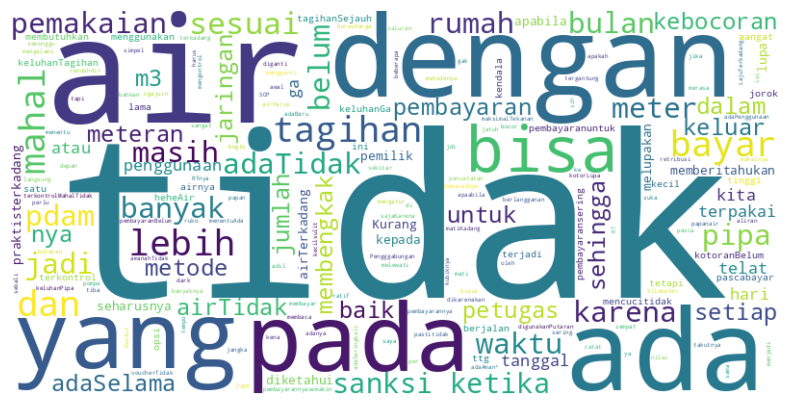

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data['text'].str.cat())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
